In [ ]:
from google.colab import drive
import shutil
!mkdir data  
drive.mount('/content/drive')
shutil.copy('drive/My Drive/data/cal_text.csv', './data/')
shutil.copy('drive/My Drive/data/expression.csv', './data/')




In [2]:
%load_ext cudf.pandas

### imports

In [3]:
from ipywidgets import interact
from google.colab.patches import cv2_imshow
import glob
import os
import time
import PIL
import cv2
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from IPython import display
from PIL import Image
from keras import layers
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from google.colab import output
import warnings
warnings.filterwarnings('ignore')
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
from IPython import get_ipython
from tensorflow import keras
from keras import datasets, layers, models,activations
from keras.optimizers import RMSprop,Adam
from keras.models import load_model
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras import Model
import pandas as pd
from tensorflow.keras.layers import RandomRotation, RandomZoom, RandomFlip
from tensorflow.keras import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Model
from tensorflow.keras import backend as K
np.random.seed(0)




### Defs

In [4]:
def string_to_array(x):
    result=np.array(x.split(' ')).reshape(50,50).astype(np.uint8)
    return result

def augment_data(x, y):
    data_augmentation = Sequential([
    RandomRotation(0.2),
    tf.keras.layers.RandomTranslation(0.2, 0.2),
    RandomZoom(0.2),
    RandomFlip("horizontal"),
    ])
    x = data_augmentation(x)
    return x, y
def plot_acc_loss(history):
    train_acc=history.history['accuracy']
    train_loss=history.history['loss']

    test_acc=history.history['val_accuracy']
    test_loss=history.history['val_loss']

    fig, ax1 = plt.subplots(figsize=(8, 6))

    ax1.plot(train_acc, label="Training Accuracy", color="blue", linestyle="-", marker="o")
    ax1.plot(test_acc, label="Validation Accuracy", color="blue", linestyle="--", marker="x")
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Accuracy', color="blue")
    ax1.tick_params(axis='y', colors="blue")

    ax2 = ax1.twinx()
    ax2.plot(train_loss, label="Training Loss", color="red", linestyle="-", marker="o")
    ax2.plot(test_loss, label="Validation Loss", color="red", linestyle="--", marker="x")
    ax2.set_ylabel('Loss', color="red")
    ax2.tick_params(axis='y', colors="red")

    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right', bbox_to_anchor=(0, 1), borderaxespad=0.)

    plt.title("Training and Validation Metrics")
    plt.tight_layout()
    plt.show()
def plot_subplot(img_list):
    grid_images = []
    for i in range(4):
        row_images = []
        for j in range(4):

            img = img_list[i*4 + j] 
            row_images.append(img)

        grid_images.append(np.hstack(row_images))

    full_grid = np.vstack(grid_images)

    cv2_imshow(full_grid)



### Expression Recognition

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_11 (Conv2D)                   │ (None, 46, 46, 32)          │             832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 23, 23, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 19, 19, 64)          │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 4, 4, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1024)                │       1,049,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 10)                  │          10,250 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,111,946 (4.24 MB)

 Trainable params: 1,111,946 (4.24 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 10s 103ms/step - accuracy: 0.1409 - loss: 2.5691 - val_accuracy: 0.3398 - val_loss: 1.8364
Epoch 2/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.4323 - loss: 1.6305 - val_accuracy: 0.6568 - val_loss: 1.1204
Epoch 3/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6976 - loss: 0.9786 - val_accuracy: 0.8066 - val_loss: 0.6661
Epoch 4/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8526 - loss: 0.5467 - val_accuracy: 0.8650 - val_loss: 0.4960
Epoch 5/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8937 - loss: 0.3568 - val_accuracy: 0.9062 - val_loss: 0.3305
Epoch 6/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9342 - loss: 0.2352 - val_accuracy: 0.9233 - val_loss: 0.2655
Epoch 7/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9565 - loss: 0.1731 - val_accuracy: 0.9256 - val_loss: 0.2537
Epoch 8/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9658 - loss: 0.1336 - val_accuracy: 0.9508 - val_lo

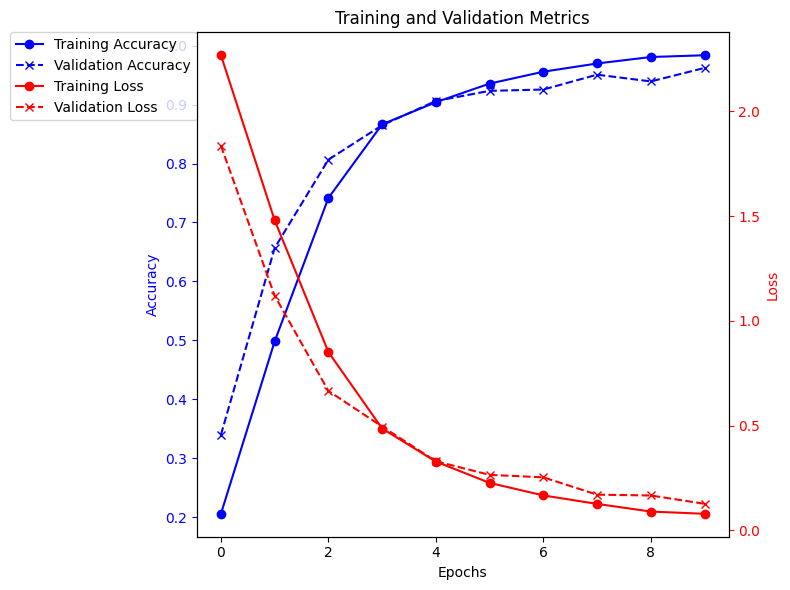

28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step
                 precision    recall  f1-score   support

        call_me       1.00      0.99      0.99        88
fingers_crossed       0.95      0.98      0.96        84
           okay       0.95      0.98      0.96        90
          paper       0.94      0.93      0.94        90
          peace       0.91      0.97      0.94        88
           rock       1.00      0.99      0.99        85
        rock_on       0.96      0.98      0.97        88
        scissor       0.95      0.89      0.92        88
         thumbs       0.98      1.00      0.99        89
             up       0.99      0.93      0.96        84

       accuracy                           0.96       874
      macro avg       0.96      0.96      0.96       874
   weighted avg       0.96      0.96      0.96       874



In [ ]:


classes=['call_me','fingers_crossed','okay','paper','peace','rock','rock_on','scissor','thumbs','up']
def get_data(file_name):
    df=pd.read_csv(file_name)

    x=np.array(df['pixel'].apply(lambda x: string_to_array(x)).tolist())
    x=(x-x.min())/(x.max()-x.min())

    y=df['class'].values
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=1/6,stratify=y, random_state=0)

    return x_train, x_test, y_train, y_test


class Expression_Classifier(Model):
    def __init__(self):
        super(Expression_Classifier, self).__init__()
        self.model=models.Sequential([layers.Conv2D(32, (5,5), activation='relu',input_shape=(50,50,1)),
                             layers.MaxPooling2D((2, 2),strides=2,padding='same'),
                             layers.Conv2D(64, (5, 5), activation=activations.sigmoid),
                             layers.MaxPooling2D((5, 5),strides=5,padding='same'),
                             layers.Flatten(),
                             layers.Dense(1024,activation='relu'),
                             layers.Dropout(0.6),
                             layers.Dense(10,activation=activations.softmax)
                             ])

    def call(self, inputs):
        return self.model(inputs)


x_train, x_test, y_train, y_test=get_data('data/expression.csv')

train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(64).shuffle(buffer_size=1000)
test_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(64)

expression_classifier=Expression_Classifier()

expression_classifier.compile(optimizer=Adam(learning_rate=0.001,beta_1=0.9,beta_2=0.999,epsilon=1e-08,decay=0.0),
                  loss=keras.losses.SparseCategoricalCrossentropy(),metrics = ['accuracy'])
expression_classifier.model.summary()

history=expression_classifier.fit(train_dataset,epochs=10,validation_data=test_dataset)
plot_acc_loss(history)


predictions=expression_classifier.predict(x_test)
predictions=np.argmax(predictions,axis=1)
predictions=predictions.reshape(1,-1)[0]
print(classification_report(y_test,predictions,target_names=classes))



### DCGAN

In [ ]:
classes=[
    '0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
    'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J',
    'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T',
    'U', 'V', 'W', 'X', 'Y', 'Z', '_'
 ]
def get_data(file_name,lbl):
    df=pd.read_csv(file_name)
    df=df[(df['is_augmented']==0) & (df['class'] == classes.index(lbl))]

    x=np.array(df['pixel'].apply(lambda x: string_to_array(x)).tolist())
    x=(x - 127.5) / 127.5


    return x

class DCGAN(Model):
    def __init__(self,noise_dim,n_chanel,img_size,seed):
        super(DCGAN, self).__init__()
        self.noise_dim=noise_dim
        self.seed=seed
        self.cross_entropy=tf.keras.losses.BinaryCrossentropy(from_logits=True)
        self.generator=models.Sequential([layers.Dense(7*7*256, use_bias=False, input_shape=(100,)),
                             layers.BatchNormalization(),
                             layers.LeakyReLU(),
                             layers.Reshape((7, 7, 256)),
                             layers.Conv2DTranspose(128, (5, 5), strides=(2, 2), padding='same', use_bias=False),
                             layers.BatchNormalization(),
                             layers.LeakyReLU(),
                             layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False),
                             layers.BatchNormalization(),
                             layers.LeakyReLU(),
                             layers.Conv2DTranspose(1, (5, 5), strides=(2, 2), padding='same', use_bias=False, activation='tanh'),
                             layers.Conv2D(1, (3, 3), activation='tanh', padding='same'),
                             layers.Cropping2D(((3, 3), (3, 3)))
                             ])

        self.discriminator=models.Sequential([layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same',
                    input_shape=[img_size, img_size, n_chanel]),
                             layers.LeakyReLU(),
                             layers.Dropout(0.3),
                             layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same'),
                             layers.LeakyReLU(),
                             layers.Dropout(0.3),
                             layers.Flatten(),
                             layers.Dense(1)
                             ])
        self.generator_optimizer = tf.keras.optimizers.Adam(1e-4)
        self.discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)

    def call(self, inputs):
        return self.generator(inputs)

    def train(self,dataset, epochs):

        for epoch in range(epochs):

            for image_batch in dataset:
                self.train_step(image_batch)


            if((epoch>1000) and (epoch%5==0) and self.generate_and_save_images(epoch,self.seed,lbl=lbl)):
                return


    def train_step(self, images):
        noise = tf.random.normal([tf.shape(images)[0], self.noise_dim])

        with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:

            generated_images = self.generator(noise, training=True)

            real_output = self.discriminator(images, training=True)
            fake_output = self.discriminator(generated_images, training=True)

            gen_loss = self.generator_loss(fake_output)
            disc_loss = self.discriminator_loss(real_output, fake_output)

        gradients_of_generator = gen_tape.gradient(gen_loss, self.generator.trainable_variables)
        gradients_of_discriminator = disc_tape.gradient(disc_loss, self.discriminator.trainable_variables)

        self.generator_optimizer.apply_gradients(zip(gradients_of_generator, self.generator.trainable_variables))
        self.discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, self.discriminator.trainable_variables))

    def discriminator_loss(self,real_output, fake_output):
        real_loss = self.cross_entropy(tf.ones_like(real_output), real_output)
        fake_loss = self.cross_entropy(tf.zeros_like(fake_output), fake_output)
        total_loss = real_loss + fake_loss
        return total_loss

    def generator_loss(self,fake_output):
        return self.cross_entropy(tf.ones_like(fake_output), fake_output)

    def generate_and_save_images(self,epoch, test_input, lbl):

        print(f'{epoch=}')

        predictions = self(test_input[:16], training=False)
        done=False
        plot_subplot(np.array(predictions)* 127.5 + 127.5)
        fig = plt.figure(figsize=(4, 4))
        for i in range(predictions.shape[0]):
            plt.subplot(4, 4, i+1)
            plt.imshow(predictions[i, :, :, 0] * 127.5 + 127.5, cmap='gray')
            plt.axis('off')


        if input('is_ok(y/n)') == 'y':
            print('saving...')
            done=True
            predictions = self(test_input, training=False)
            for i in range(predictions.shape[0]):
                plt.imshow(predictions[i, :, :, 0] * 127.5 + 127.5, cmap='gray')
                plt.axis('off')
                plt.savefig(f'dcgan/{lbl}_{i}_dcgan.jpg')
            print('saving complete')

            return done
        return done



img_size=50
n_chanel=1
EPOCHS = 2000
noise_dim = 100
num_examples_to_generate = 1200
BUFFER_SIZE = 60000
BATCH_SIZE = 256
os.makedirs('dcgan',exist_ok=True)


lbl='A'
file_name='data/cal_text.csv'
train_images=get_data(file_name,lbl)

train_dataset = tf.data.Dataset.from_tensor_slices(train_images).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)







epoch=1005


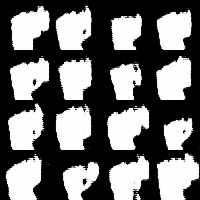

is_ok(y/n)n
epoch=1010


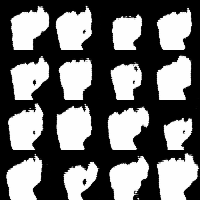

is_ok(y/n)y
saving...
saving complete


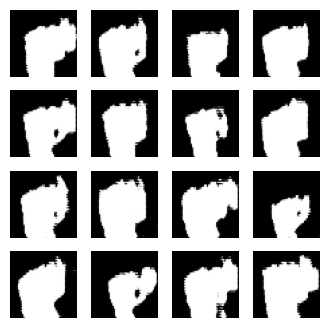

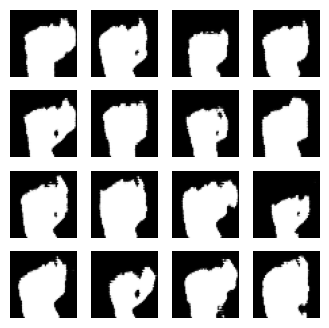

In [ ]:
seed = tf.random.normal([num_examples_to_generate, noise_dim])
dcgan_model=DCGAN(noise_dim=noise_dim,n_chanel=n_chanel,img_size=img_size,seed=seed)

dcgan_model.train(train_dataset, EPOCHS)

### Calculation and Text Recognition

In [12]:
classes=[
    '0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
    'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S',
    'T', 'U', 'V', 'W', 'X', 'Y', 'Z', '_'
 ]

lbls_type_dict={
    'cal':['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'],
    'text':[
        'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S',
        'T', 'U', 'V', 'W', 'X', 'Y', 'Z', '_'
    ]
}

class Cal_text_classifier(Model):
    def __init__(self):
        super(Cal_text_classifier, self).__init__()
        self.model=models.Sequential([layers.Conv2D(16, (2,2), activation='relu',input_shape=(50,50,1)),
                                    layers.MaxPooling2D((2, 2),strides=2,padding='same'),
                                    layers.Conv2D(32, (5, 5), activation='relu'),
                                    layers.MaxPooling2D((5, 5),strides=5,padding='same'),
                                    layers.Conv2D(64,(5,5),activation='relu'),
                                    layers.Flatten(),
                                    layers.Dense(128,activation='relu'),
                                    layers.Dropout(0.2),
                                    layers.Dense(37,activation=activations.softmax)
                                     ])

    def call(self, inputs):
        return self.model(inputs)

## calculation and text characters prediction based on just dcgan data

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_13 (Conv2D)                   │ (None, 49, 49, 16)          │              80 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 25, 25, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 21, 21, 32)          │          12,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 5, 5, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 1, 1, 64)            │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 37)                  │           4,773 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 77,269 (301.83 KB)

 Trainable params: 77,269 (301.83 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 6s 56ms/step - accuracy: 0.0393 - loss: 3.6075 - val_accuracy: 0.0869 - val_loss: 3.5825
Epoch 2/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.0937 - loss: 3.5741 - val_accuracy: 0.1023 - val_loss: 3.5391
Epoch 3/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.1046 - loss: 3.5190 - val_accuracy: 0.1209 - val_loss: 3.4259
Epoch 4/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.1576 - loss: 3.3573 - val_accuracy: 0.2536 - val_loss: 3.0123
Epoch 5/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.3139 - loss: 2.7695 - val_accuracy: 0.5099 - val_loss: 1.9317
Epoch 6/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.5335 - loss: 1.7532 - val_accuracy: 0.5827 - val_loss: 1.3489
Epoch 7/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.5884 - loss: 1.3529 - val_accuracy: 0.6670 - val_loss: 1.0827
Epoch 8/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.6758 - loss: 1.0548 - val_accuracy: 0.7627 - v

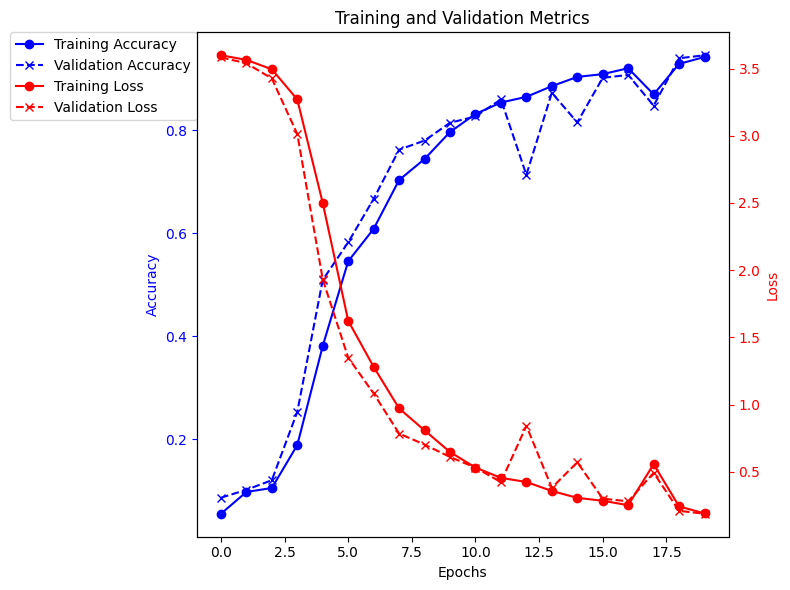

232/232 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       200
           1       0.89      0.94      0.91       200
           2       0.90      0.96      0.93       200
           3       0.96      0.95      0.96       200
           4       0.97      0.97      0.97       200
           5       0.97      0.98      0.98       200
           6       0.99      1.00      0.99       200
           7       0.99      0.97      0.98       200
           8       0.98      0.94      0.96       200
           9       0.97      0.99      0.98       200
           A       0.92      0.91      0.91       200
           B       0.95      0.86      0.90       200
           C       0.95      0.95      0.95       200
           D       0.93      0.92      0.92       200
           E       0.87      0.98      0.92       200
           F       0.82      0.86      0.84       200
           G       0.88      0.98      0

In [13]:
def get_data(file_name,mode,n_train_samples,n_test_samples):

    df=pd.read_csv(file_name)
    df_normal = df[df['is_augmented'] == 0]
    df_dcgan = df[df['is_augmented'] == 1]

    x_normal=np.array(df_normal['pixel'].apply(lambda x: string_to_array(x)).tolist())
    x_normal=(x_normal-x_normal.min())/(x_normal.max()-x_normal.min())

    y_normal=df_normal['class'].values

    x_dcgan=np.array(df_dcgan['pixel'].apply(lambda x: string_to_array(x)).tolist())
    x_dcgan=(x_dcgan-x_dcgan.min())/(x_dcgan.max()-x_dcgan.min())

    y_dcgan=df_dcgan['class'].values



    if mode == 'normal':
        x_train, x_test, y_train, y_test = train_test_split(x_normal, y_normal,train_size=n_train_samples,test_size=n_test_samples,stratify=y_normal, random_state=0)

    elif mode == 'dcgan':
        x_train, x_test, y_train, y_test = train_test_split(x_dcgan, y_dcgan,train_size=n_train_samples,test_size=n_test_samples,stratify=y_dcgan, random_state=0)
    else:
        x_combine=np.concatenate((x_normal,x_dcgan))
        y_combine=np.concatenate((y_normal,y_dcgan))
        x_train, x_test, y_train, y_test = train_test_split(x_combine, y_combine,train_size=n_train_samples,test_size=n_test_samples,stratify=y_combine, random_state=0)


    return x_train,x_test,y_train,y_test

x_train, x_test, y_train, y_test=get_data('data/cal_text.csv',mode='dcgan',n_train_samples=37000,n_test_samples=7400)

cal_text_classifier=Cal_text_classifier()

train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(500).shuffle(buffer_size=1000)
test_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(500)

cal_text_classifier.compile(optimizer=keras.optimizers.SGD(learning_rate=0.01,momentum=0.0,decay=0.0,nesterov=False),loss=keras.losses.SparseCategoricalCrossentropy(),metrics = ['accuracy'])
cal_text_classifier.model.summary()
history=cal_text_classifier.fit(train_dataset,epochs=20,validation_data=test_dataset)
plot_acc_loss(history)

predictions=cal_text_classifier.predict(x_test)
predictions=np.argmax(predictions,axis=1)
predictions=predictions.reshape(1,-1)[0]
print(classification_report(y_test,predictions,target_names=classes))


for lbl_type in ['cal','text']:

    for n_sample in [500, 1000, 1500, 2000]:
        sub_lbls_idx=[classes.index(i) for i in lbls_type_dict[lbl_type]]
        indices = np.where(np.isin(y_test, sub_lbls_idx))[0]
        if (indices.shape[0]<n_sample):
            print('not enough data')
            continue

        rand_idxs=np.random.choice(indices,n_sample,replace=False)
        sub_x_test=x_test[rand_idxs]
        sub_y_test=y_test[rand_idxs]

        predict_x=cal_text_classifier.predict(sub_x_test)
        predictions=np.argmax(predict_x,axis=1)
        predictions=predictions.reshape(1,-1)[0]
        accuracy = accuracy_score(sub_y_test, predictions)
        print(f'{lbl_type=},{n_sample=},{accuracy=}')


## comparing dcgan + cnn  vs cnn

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_16 (Conv2D)                   │ (None, 49, 49, 16)          │              80 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 25, 25, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 21, 21, 32)          │          12,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 5, 5, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 1, 1, 64)            │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_6 (Flatten)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 37)                  │           4,773 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 77,269 (301.83 KB)

 Trainable params: 77,269 (301.83 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - accuracy: 0.0314 - loss: 3.6103 - val_accuracy: 0.0490 - val_loss: 3.6009
Epoch 2/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.0555 - loss: 3.5960 - val_accuracy: 0.0670 - val_loss: 3.5884
Epoch 3/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.0740 - loss: 3.5801 - val_accuracy: 0.0750 - val_loss: 3.5686
Epoch 4/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.0898 - loss: 3.5525 - val_accuracy: 0.1030 - val_loss: 3.5268
Epoch 5/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.1317 - loss: 3.4897 - val_accuracy: 0.1350 - val_loss: 3.4110
Epoch 6/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.1733 - loss: 3.2985 - val_accuracy: 0.2375 - val_loss: 2.9373
Epoch 7/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.4343 - loss: 2.5042 - val_accuracy: 0.4875 - val_loss: 1.7747
Epoch 8/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.6486 - loss: 1.3255 - val_accuracy: 0.5990 - v

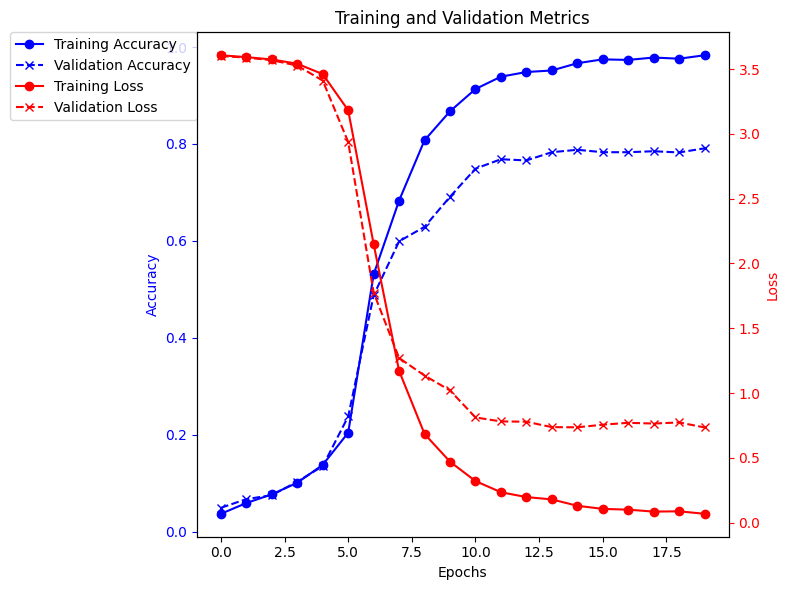

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step
data_mode='normal',n_sample=500,accuracy=0.796
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
data_mode='normal',n_sample=1000,accuracy=0.796
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
data_mode='normal',n_sample=1500,accuracy=0.7886666666666666
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
data_mode='normal',n_sample=2000,accuracy=0.791


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_19 (Conv2D)                   │ (None, 49, 49, 16)          │              80 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 25, 25, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_20 (Conv2D)                   │ (None, 21, 21, 32)          │          12,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 5, 5, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_21 (Conv2D)                   │ (None, 1, 1, 64)            │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_7 (Flatten)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 37)                  │           4,773 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 77,269 (301.83 KB)

 Trainable params: 77,269 (301.83 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - accuracy: 0.0341 - loss: 3.6038 - val_accuracy: 0.0515 - val_loss: 3.5884
Epoch 2/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.0752 - loss: 3.5791 - val_accuracy: 0.1005 - val_loss: 3.5570
Epoch 3/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.1289 - loss: 3.5363 - val_accuracy: 0.1485 - val_loss: 3.4779
Epoch 4/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.1735 - loss: 3.4201 - val_accuracy: 0.2160 - val_loss: 3.1868
Epoch 5/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.2721 - loss: 2.9486 - val_accuracy: 0.4750 - val_loss: 2.1288
Epoch 6/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.5638 - loss: 1.7549 - val_accuracy: 0.4935 - val_loss: 1.7223
Epoch 7/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.6476 - loss: 1.2000 - val_accuracy: 0.6230 - val_loss: 1.1414
Epoch 8/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.7517 - loss: 0.8280 - val_accuracy: 0.7095 - v

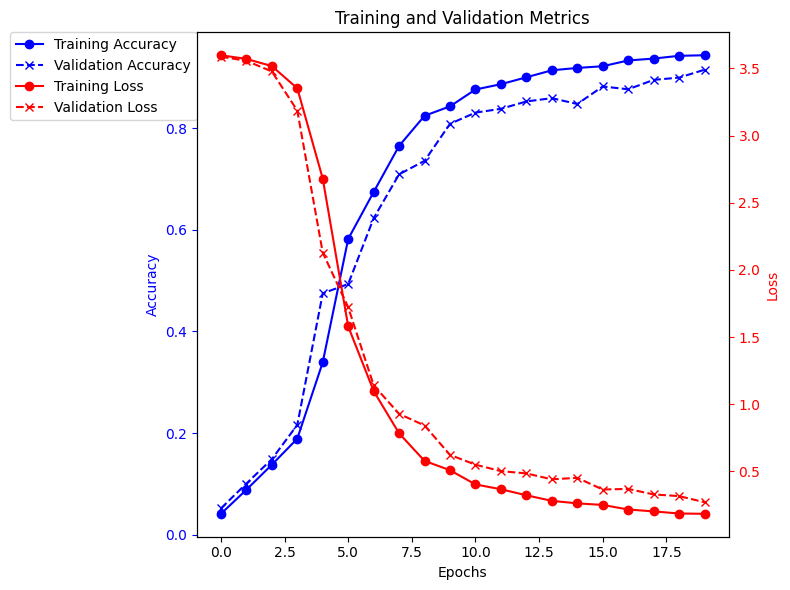

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step
data_mode='combine',n_sample=500,accuracy=0.922
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
data_mode='combine',n_sample=1000,accuracy=0.921
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
data_mode='combine',n_sample=1500,accuracy=0.92
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
data_mode='combine',n_sample=2000,accuracy=0.9155


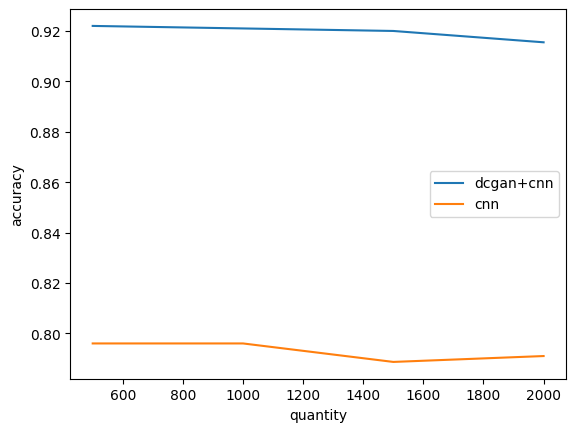

In [14]:
def get_data(file_name,mode,n_train_samples,n_test_samples):

    df=pd.read_csv(file_name)
    df_normal = df[df['is_augmented'] == 0]
    df_dcgan = df[df['is_augmented'] == 1]

    x_normal=np.array(df_normal['pixel'].apply(lambda x: string_to_array(x)).tolist())
    y_normal=df_normal['class'].values

    x_dcgan=np.array(df_dcgan['pixel'].apply(lambda x: string_to_array(x)).tolist())
    y_dcgan=df_dcgan['class'].values

    x_dcgan_rest, x_test, y_dcgan_rest, y_test = train_test_split(x_dcgan, y_dcgan, test_size=n_test_samples,stratify=y_dcgan, random_state=0)

    if mode == 'normal':
        x_train, _, y_train, _ = train_test_split(x_normal, y_normal, train_size=n_train_samples,stratify=y_normal, random_state=0)

    elif mode == 'dcgan':
        x_train, _, y_train, _ = train_test_split(x_dcgan_rest, y_dcgan_rest, train_size=n_train_samples,stratify=y_dcgan_rest, random_state=0)
    else:
        x_combine=np.concatenate((x_normal,x_dcgan_rest))
        y_combine=np.concatenate((y_normal,y_dcgan_rest))
        x_train, _, y_train, _ = train_test_split(x_combine, y_combine, train_size=n_train_samples,stratify=y_combine, random_state=0)


    x_train=(x_train-x_train.min())/(x_train.max()-x_train.min())
    x_test=(x_test-x_test.min())/(x_test.max()-x_test.min())


    return x_train,x_test,y_train,y_test

data_for_plot={}
for data_mode in ['normal','combine']:
    data_for_plot[data_mode]=[]

    x_train, x_test, y_train, y_test=get_data('data/cal_text.csv',mode=data_mode,n_train_samples=37000,n_test_samples=2000)

    cal_text_classifier=Cal_text_classifier()

    train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(500).shuffle(buffer_size=1000)
    test_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(500)

    cal_text_classifier.compile(optimizer=keras.optimizers.SGD(learning_rate=0.01,momentum=0.0,decay=0.0,nesterov=False),loss=keras.losses.SparseCategoricalCrossentropy(),metrics = ['accuracy'])
    cal_text_classifier.model.summary()
    history=cal_text_classifier.fit(train_dataset,epochs=20,validation_data=test_dataset)
    plot_acc_loss(history)


    for n_sample in [500, 1000, 1500, 2000]:
        sub_x_test=x_test[:n_sample]
        sub_y_test=y_test[:n_sample]

        predictions=cal_text_classifier.predict(sub_x_test)
        predictions=np.argmax(predictions,axis=1)
        predictions=predictions.reshape(1,-1)[0]
        accuracy = accuracy_score(sub_y_test, predictions)
        print(f'{data_mode=},{n_sample=},{accuracy=}')
        data_for_plot[data_mode].append(accuracy)



x_range = [500, 1000, 1500, 2000]
plt.plot(x_range, data_for_plot['combine'], label ='dcgan+cnn')
plt.plot(x_range, data_for_plot['normal'], label ='cnn')
plt.xlabel("quantity")
plt.ylabel("accuracy")
plt.legend()
plt.show()
